In [38]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [70]:
#Fetch Images count from Fodlers

In [2]:
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
Images Folder has 3333 Images


In [72]:
#Load Images into Arrays as Dataset

In [39]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [41]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 3333 files belonging to 4 classes.
Using 2667 files for training.
Found 3333 files belonging to 4 classes.
Using 666 files for validation.


In [42]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower']

In [43]:
import matplotlib.pyplot as plt

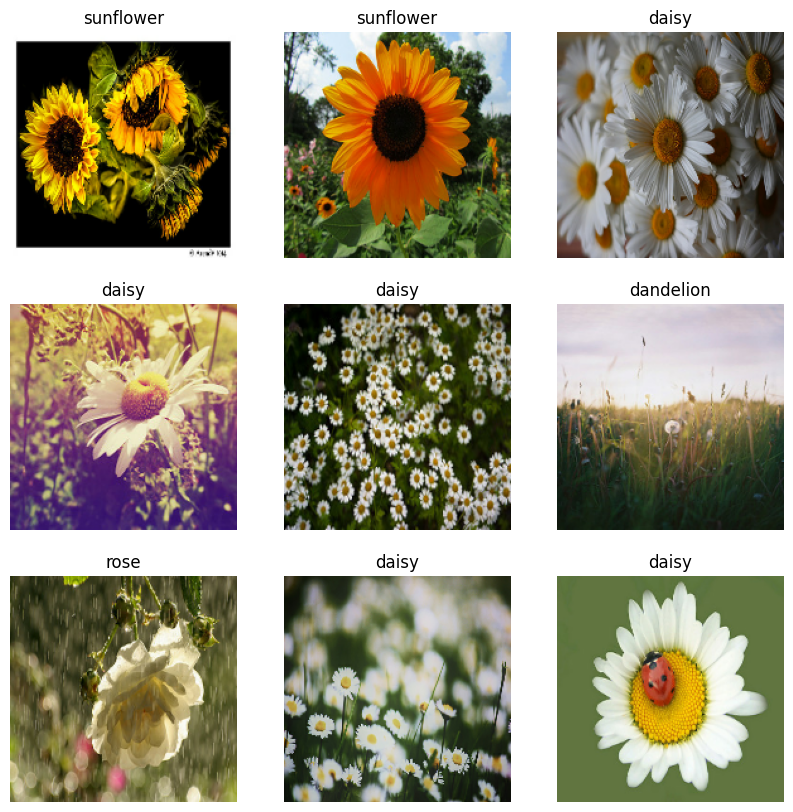

In [44]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [45]:
AUTOTUNE = tf.data.AUTOTUNE

In [26]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [46]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [10]:
#Data Augmentation

In [47]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

d:\Downloads\flower_recognition\myenv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


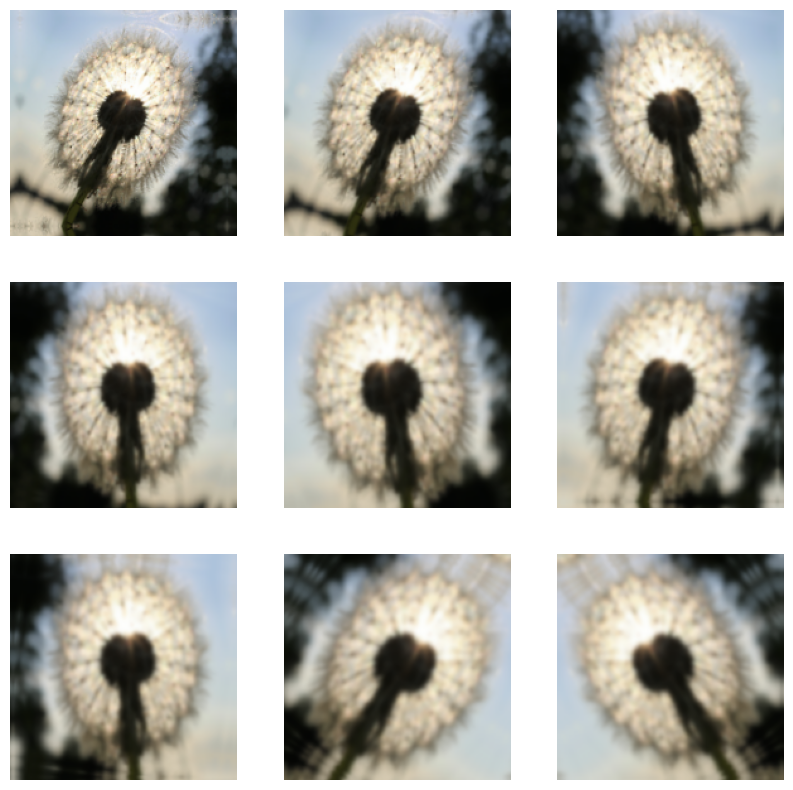

In [48]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [84]:
#MOdel Creation

In [49]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 450ms/step - accuracy: 0.4396 - loss: 1.3085 - val_accuracy: 0.6231 - val_loss: 0.8773
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 417ms/step - accuracy: 0.6367 - loss: 0.8511 - val_accuracy: 0.7012 - val_loss: 0.7875
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 326ms/step - accuracy: 0.6989 - loss: 0.7738 - val_accuracy: 0.6772 - val_loss: 0.8404
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - accuracy: 0.7119 - loss: 0.7271 - val_accuracy: 0.7372 - val_loss: 0.7127
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 317ms/step - accuracy: 0.7628 - loss: 0.6407 - val_accuracy: 0.7087 - val_loss: 0.8109
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 26s 315ms/step - accuracy: 0.7611 - loss: 0.6335 - val_accuracy: 0.7237 - val_loss: 0.7676
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 318ms/step - accuracy: 0.7727 - loss: 0.6063 - val_accuracy: 0.7312 - val_loss: 0.6783
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 324ms/step - accuracy: 0.7885 - loss: 0.5547 - val_accuracy: 0.738

In [54]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [55]:
classify_images('Sample/R.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


'The Image belongs to rose with a score of 99.99552965164185'

In [57]:
model.save('Flower_Recog_Model.keras')